# Walks into a bar jokes

This is a notebook for webscraping walks-into-a-bar jokes from 4 different websites listed on later cells.
The final dataset is generated using this script.

## Imports

In [1]:
from typing import Dict, List
import re
import time


import numpy as np
import pandas as pd
from pandas import options
import warnings

import requests
from bs4 import BeautifulSoup
from seleniumconfig import get_driver
from selenium.webdriver.common.by import By

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


## URLS

The following are the sources I have used to collect the jokes.

In [2]:
urls: Dict[str, str] = {
    'grammarbook': 'https://www.grammarbook.com/blog/definitions/walks-into-a-bar/',
    'thrillist': 'https://www.thrillist.com/culture/best-walks-into-a-bar-jokes',
    'jokojokes': 'https://jokojokes.com/walks-into-a-bar-jokes.html',
    'gamertelligence': 'https://www.gamertelligence.com/walks-into-a-bar-jokes/'
}

### 1. Extracting `www.grammarbook.com`

Almost all the jokes here are in the form of `<p>` tags under `div` class `content_user-content`
There are some bits of non-joke texts as well which I had to painstakingly find the indices of, and 
pass them for pruning.
Its pretty brute-force but I couldn't think of any better idea.

In [3]:
# requests user-agent config

headers = {
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36'
}

response = requests.get(urls['grammarbook'], headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

div = soup.find_all('div', class_='content_user-content')[0]

In [4]:
for item in div.find_all('p'):
    print(item.get_text())

The phrase A ______ walks into a bar has provided the take-off point for an uncountable number of jokes over the years. No matter what one’s opinion is of bars, we hope that everyone can appreciate the lessons in English grammar contained in the clever sentences that follow:
A dangling participle walks into a bar. Enjoying a cocktail and chatting with the bartender, the evening passes pleasantly.
A bar was walked into by the passive voice.
An oxymoron walked into a bar, and the silence was deafening.
Two quotation marks walk into a “bar.”
A malapropism walks into a bar, looking for all intensive purposes like a wolf in cheap clothing, muttering epitaphs and casting dispersions on his magnificent other, who takes him for granite.
Hyperbole totally rips into this insane bar and absolutely destroys everything.
A question mark walks into a bar?
A non sequitur walks into a bar. In a strong wind, even turkeys can fly.
Papyrus and Comic Sans walk into a bar. The bartender says, “Get out—we do

In [5]:
jokes_list: List[str] = []

garbage_idx: List[int] = [0, *range(28, 33), 36, 37, 42, *range(48, 58)]


for i, item in enumerate(div.find_all('p')):
    if i not in garbage_idx:
        jokes_list += item.get_text(strip=True, separator='\n').splitlines()

In [6]:
for i, item in enumerate(jokes_list):
    print(f"{i}: {item}")

0: A dangling participle walks into a bar. Enjoying a cocktail and chatting with the bartender, the evening passes pleasantly.
1: A bar was walked into by the passive voice.
2: An oxymoron walked into a bar, and the silence was deafening.
3: Two quotation marks walk into a “bar.”
4: A malapropism walks into a bar, looking for all intensive purposes like a wolf in cheap clothing, muttering epitaphs and casting dispersions on his magnificent other, who takes him for granite.
5: Hyperbole totally rips into this insane bar and absolutely destroys everything.
6: A question mark walks into a bar?
7: A non sequitur walks into a bar. In a strong wind, even turkeys can fly.
8: Papyrus and Comic Sans walk into a bar. The bartender says, “Get out—we don’t serve your type.”
9: A mixed metaphor walks into a bar, seeing the handwriting on the wall but hoping to nip it in the bud.
10: A comma splice walks into a bar, it has a drink and then leaves.
11: Three intransitive verbs walk into a bar. They s

I create a dataframe `df_jokes` to store all the 50 jokes collected from the first website.
`df_jokes` will serve as the main dataframe to append new jokes to.

In [7]:
df_jokes = pd.DataFrame({
    'joke': jokes_list
})

df_jokes.head()

,joke
0,A dangling participle walks into a bar. Enjoyi...
1,A bar was walked into by the passive voice.
2,"An oxymoron walked into a bar, and the silence..."
3,Two quotation marks walk into a “bar.”
4,"A malapropism walks into a bar, looking for al..."


In [8]:
# merge 30 & 31 as part of the same joke

df_jokes.iloc[30].joke = df_jokes.iloc[30].joke + ' ' + df_jokes.iloc[31].joke
df_jokes.drop(31, inplace=True)
df_jokes.reset_index(drop=True, inplace=True)

In [9]:
options.display.max_colwidth = 50

df_jokes

,joke
0,A dangling participle walks into a bar. Enjoyi...
1,A bar was walked into by the passive voice.
2,"An oxymoron walked into a bar, and the silence..."
3,Two quotation marks walk into a “bar.”
4,"A malapropism walks into a bar, looking for al..."
5,Hyperbole totally rips into this insane bar an...
6,A question mark walks into a bar?
7,A non sequitur walks into a bar. In a strong w...
8,Papyrus and Comic Sans walk into a bar. The ba...
9,"A mixed metaphor walks into a bar, seeing the ..."


### 2. Extracting `https://www.thrillist.com`

Here again, most of the jokes are in `<p>` tags, except the first 2 and the last lines.
Hence I trimmed them down.

In [10]:
response = requests.get(urls['thrillist'], headers=headers)    

In [11]:
soup = BeautifulSoup(response.content, 'html.parser')


jokes_thrillist = list(map(lambda para: para.text, soup.find_all('p')))
jokes_thrillist = jokes_thrillist[2:-1]
jokes_thrillist[:5]

[' A guy walks into a bar and asks for 10 shots of the establishment’s finest single malt scotch. The bartender sets him up, and the guy takes the first shot in the row and pours it on the floor. He then takes the last shot in the row and does the same. The bartender asks, "Why did you do that?" And the guy replies, "Well the first shot always tastes like crap, and the last one always makes me sick!" ',
 ' Three vampires walk into a bar. The first one says, "I\'ll have a pint of blood." The second one says, "I\'ll have one, too." The third one says, "I\'ll have a pint of plasma." The bartender says, "So, that\'ll be two Bloods and a Blood Lite?" ',
 ' A guy walks into a bar after a long day at work and orders a drink. As he sits there, mulling over his day, he hears a high-pitched voice say, "That shirt looks great on you!” The man looks around, doesn’t see anything, and returns to his drink thinking nothing more of it. But then, a moment later, the voice returns, this time offering, “

In [12]:
df_jokes = df_jokes.append(pd.DataFrame({'joke': jokes_thrillist}), ignore_index=True)
df_jokes[-10:]

,joke
60,"A horse walks into a bar, and the bartender a..."
61,A mushroom walks into a bar and orders a drin...
62,Two friends are walking their dogs together. ...
63,A guy walks into a bar and orders 12 shots. B...
64,A sandwich walks into a bar. The bartender sa...
65,A young man is passing by a bar when he sees ...
66,A lion walks into a bar and asks the bartende...
67,"A bartender says, “We don’t serve time travel..."
68,"The past, present and future walk into a bar...."
69,"A three-legged dog walks into a saloon, his s..."


### 3. Extracting `www.jokojokes.com`

jokes are inside `div` class `listjoke`, however, the texts contain emojis which are removed.

In [13]:
response = requests.get(urls['jokojokes'], headers=headers)

In [14]:
soup = BeautifulSoup(response.content, 'html.parser')

jokes = []
list_jokojokes = list(map(lambda div: div.text, soup.find_all('div', class_='listjoke')))
for joke in list_jokojokes:
    jokes.append(joke.replace('👍🏼', '').replace('\n', ''))

len(jokes)

71

In [15]:
df_jokes = pd.concat([df_jokes, pd.DataFrame({'joke': jokes})], ignore_index=True)
df_jokes.shape

(141, 1)

The problem is that although the BeautifulSoup did capture 71 jokes, there are more jokes under `load more`
which requires scrolling to the bottom of the page until the infinite scroll terminates, for which
we require `Selenium` automation.
We use it to scroll until the page ends and once the entire page content is unravelled we extract all the
jokes using the same element selection.

In [16]:
def scroll(driver, timeout):
    scroll_pause_time = timeout

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:

        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(scroll_pause_time)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # If heights are the same it will exit the function
            break
        last_height = new_height


In [17]:
driver = get_driver(headless=False)
driver.get(urls['jokojokes'])


driver.find_element(By.CLASS_NAME, 'yellow-button').click()
driver.implicitly_wait(1)


scroll(driver, 2)
jokes_new = []
list_jk = list(map(lambda x: x.text, driver.find_elements(By.XPATH, "//div[@class='listjoke']")))
for joke in list_jk:
    jokes_new.append(joke.replace('👍🏼', '').replace('\n', ''))


driver.quit()
len(jokes_new)

1185

In [18]:
df_jokes = pd.concat([df_jokes, pd.DataFrame({'joke': jokes_new})], ignore_index=True)
df_jokes.shape

(1326, 1)

### Extracting `www.gamertelligence.com`

The jokes are divided into two parts. The first part is in the form of heading, under `h4.quest.Jokes`, 
and the remainder in the `learn-more-content` div. `innerText`.
However, underneath `learn-more-content`, there are a couple of nested jokes which are interfering with
the automation. Hence, for the sake of sanity, those nested jokes have been removed, ending with
fewer jokes.

In [19]:
driver = get_driver(headless=False)

driver.get(urls['gamertelligence'])
driver.implicitly_wait(2)
headers = driver.find_elements(By.CSS_SELECTOR, 'div.post-content.entry-content > h4.quest.Jokes')
paras = driver.find_elements(By.CSS_SELECTOR, "div.post-content.entry-content > div.joke > div.learn-more-content > p")
remove = driver.find_elements(By.CSS_SELECTOR, "div.post-content.entry-content > div.joke > div.learn-more-content > p ~ p")


jokes = []
headers = [header.get_attribute('innerText') for header in headers]
paras = [elem.get_attribute('innerText') for elem in paras]
remove = [elem.get_attribute('innerText') for elem in remove]
paras = [para for para in paras if para not in remove]

print(len(headers), len(paras))
driver.quit()

172 171


Removing enumerations for each header, as well as trailing elipsis.

In [20]:
headers = [re.sub(r"^[0-9]+\. ", '', header) for header in headers]
headers = [re.sub(r"\.{2,}\w", '. ', header) for header in headers]

jokes = []
for i, (h, p) in enumerate(zip(headers, paras)):
        jokes.append(h + p)

jokes.append(headers[-1])       # last joke contains only header

len(jokes)

172

In [21]:
df_jokes = pd.concat([df_jokes, pd.DataFrame({'joke': jokes})], ignore_index=True)

In [22]:
# removing unnecessary words
df_jokes['joke'] = df_jokes['joke'].str.replace('show answer', '', case=False, regex=False)
df_jokes['joke'] = df_jokes['joke'].str.replace("[\learn_nore]", '', case=False, regex=False)

df_jokes.shape

(1498, 1)

In [27]:
df_jokes.reset_index(drop=True, inplace=True)
)
df_jokes.to_csv('jokes.csv')


And finally, it is done.

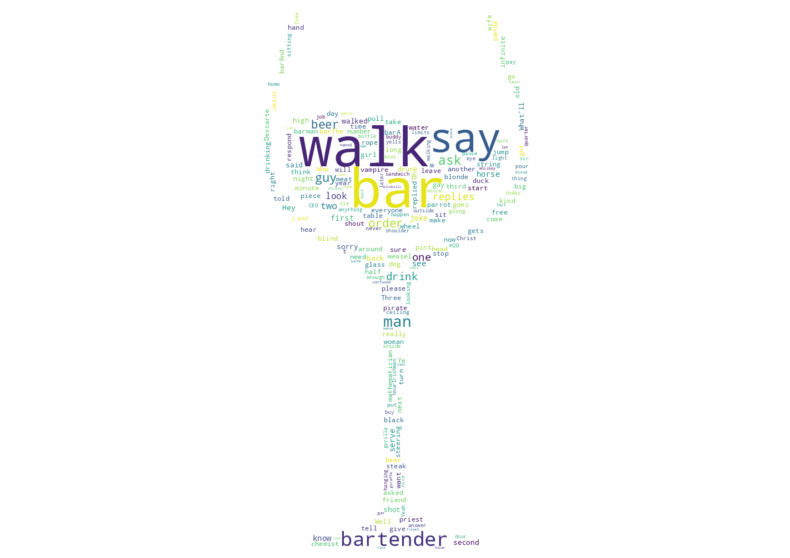

In [31]:
from wordcloud import WordCloud
from PIL import Image

img = Image.open('data/wine.jpg')
img = np.array(img.convert('L'))


txt = " ".join(df_jokes['joke'])
wc = WordCloud(mask=img,  collocations=False, background_color='white', height=500, width=800).generate(txt)

plt.figure(figsize=(20, 10))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
df = pd.read_csv('jokes.csv')
df.shape

(1498, 2)